In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('SeoulBikeData-Copy1.csv', encoding='latin-1')

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format= "%d/%m/%Y")
df['Week Day']=df['Date'].dt.day_name()
df['Month-Year'] = df['Date'].dt.strftime('%Y-%m')

df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day Week Day Month-Year  
0             Yes   Friday    2017-12  
1             Yes   Friday    2017-12  
2             Yes   Friday    2017-12  
3             Yes   Friday    2017-12  
4             Yes   Friday    2017-12

In [8]:
#print(df.isna().sum())
#print(df.isnull().sum())

# DEA
En una primera instancia, se busca analizar el comportamiento del dataframe entre sus diferentes variables. En general, se observa que la mayoría de los datos están presentes en todas las variables, a excepción de las columnas "Rainfall(mm)" y "Snowfall(mm)". Estas dos últimas columnas presentan valores condicionados por la estacionalidad, es decir, otoño e invierno.

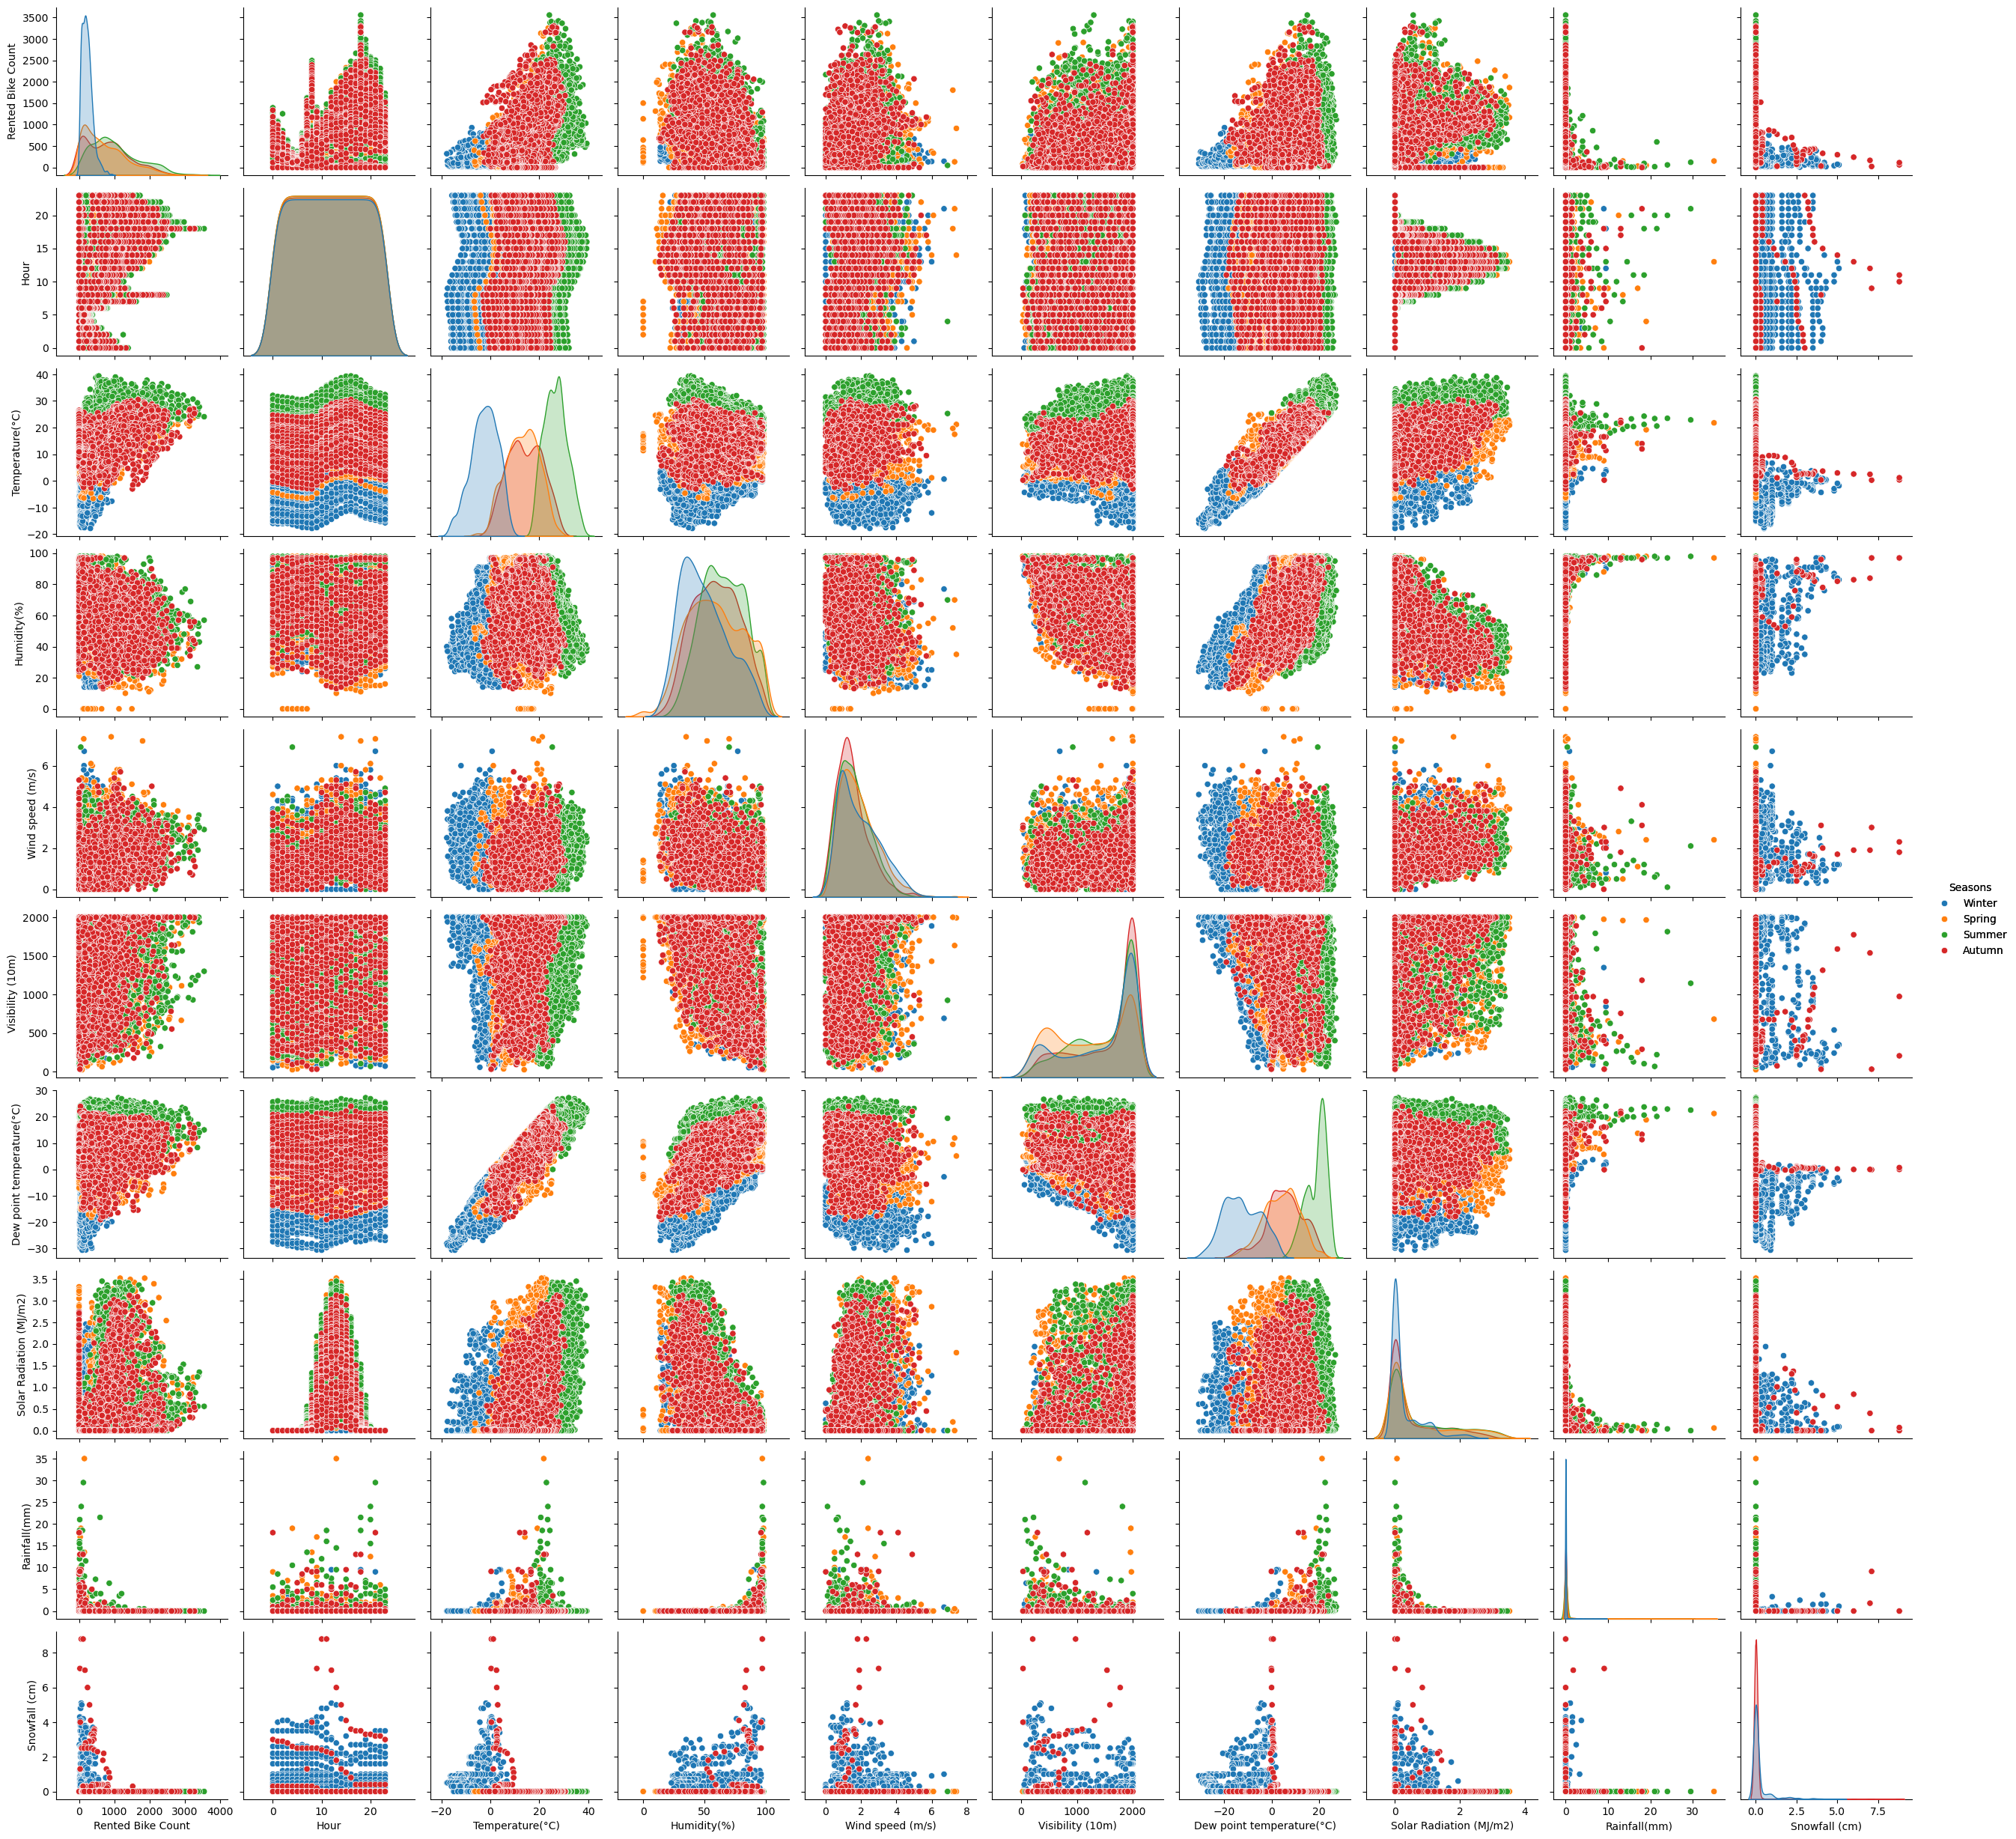

In [9]:
t = sns.pairplot(df, hue='Seasons')
t.add_legend()

<Axes: xlabel='Snowfall (cm)'>

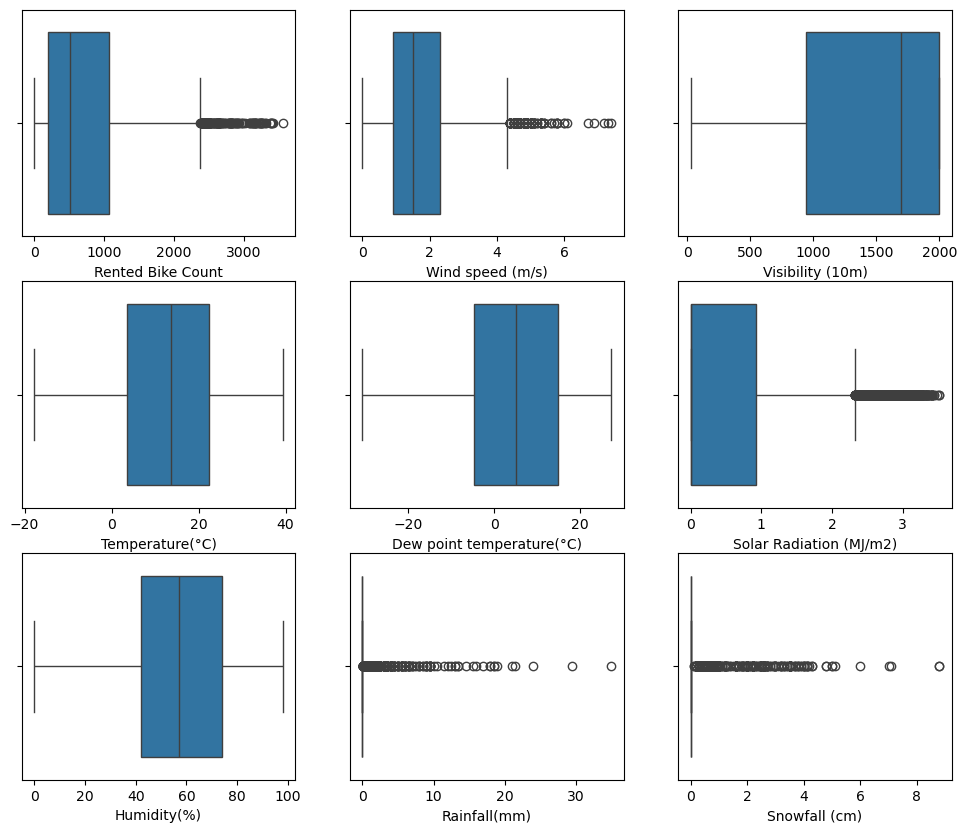

In [62]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

sns.boxplot(x=df['Rented Bike Count'], ax=axs[0, 0])
sns.boxplot(x=df['Temperature(°C)'], ax=axs[1, 0])
sns.boxplot(x=df['Humidity(%)'], ax=axs[2, 0])
sns.boxplot(x=df['Wind speed (m/s)'], ax=axs[0, 1])
sns.boxplot(x=df['Visibility (10m)'], ax=axs[0, 2])
sns.boxplot(x=df['Dew point temperature(°C)'], ax=axs[1, 1])
sns.boxplot(x=df['Solar Radiation (MJ/m2)'], ax=axs[1, 2])
sns.boxplot(x=df['Rainfall(mm)'], ax=axs[2, 1])
sns.boxplot(x=df['Snowfall (cm)'], ax=axs[2, 2])

Se ve la presencia de outliers en la cantidad de Bike Rented Count, Rainfall(mm) y Snowfall(cm), por tanto se eliminaran

In [75]:
Q1 = df['Rainfall(mm)'].quantile(0.25)
Q3 = df['Rainfall(mm)'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['Rainfall(mm)'] >= lower_limit) & (df['Rainfall(mm)'] <= upper_limit)]

In [83]:
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['Rented Bike Count'] >= lower_limit) & (df['Rented Bike Count'] <= upper_limit)]

In [85]:
Q1 = df['Snowfall (cm)'].quantile(0.25)
Q3 = df['Snowfall (cm)'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['Snowfall (cm)'] >= lower_limit) & (df['Snowfall (cm)'] <= upper_limit)]

<Axes: xlabel='Snowfall (cm)'>

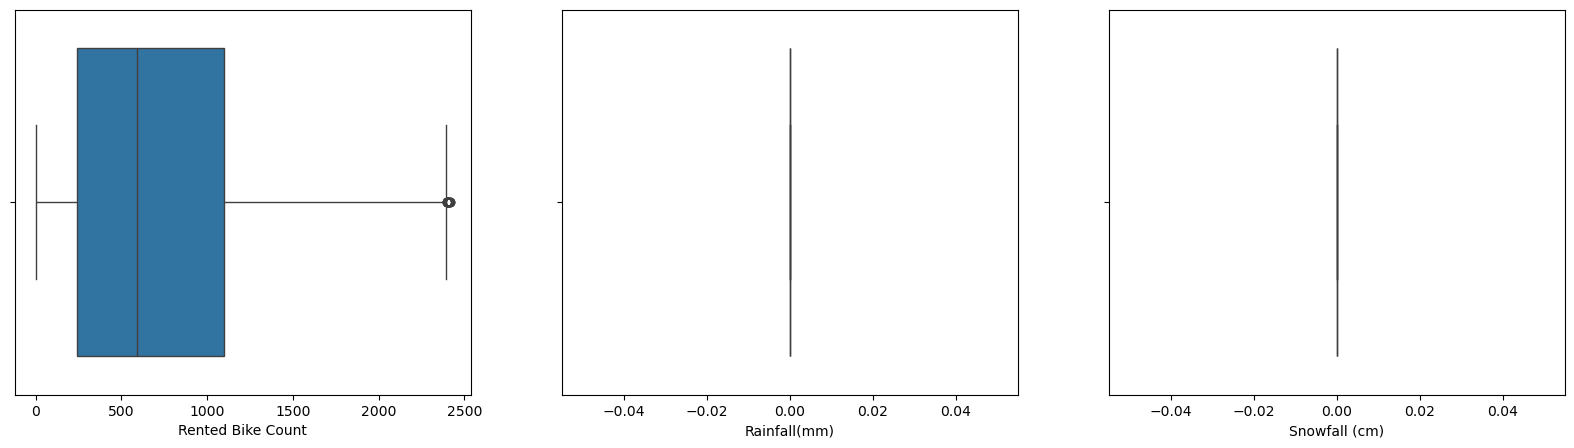

In [137]:
fig, axs = plt.subplots( nrows=1, ncols=3, figsize=(20, 5))

sns.boxplot(x=df['Rented Bike Count'], ax = axs[0])
sns.boxplot(x=df['Rainfall(mm)'], ax = axs[1])
sns.boxplot(x=df['Snowfall (cm)'], ax = axs[2])

Se elimian los outliers 

In [140]:
bikePerDay = df.groupby('Date').sum()
period_range = pd.period_range(start='2017-11', end='2018-11', freq='M')

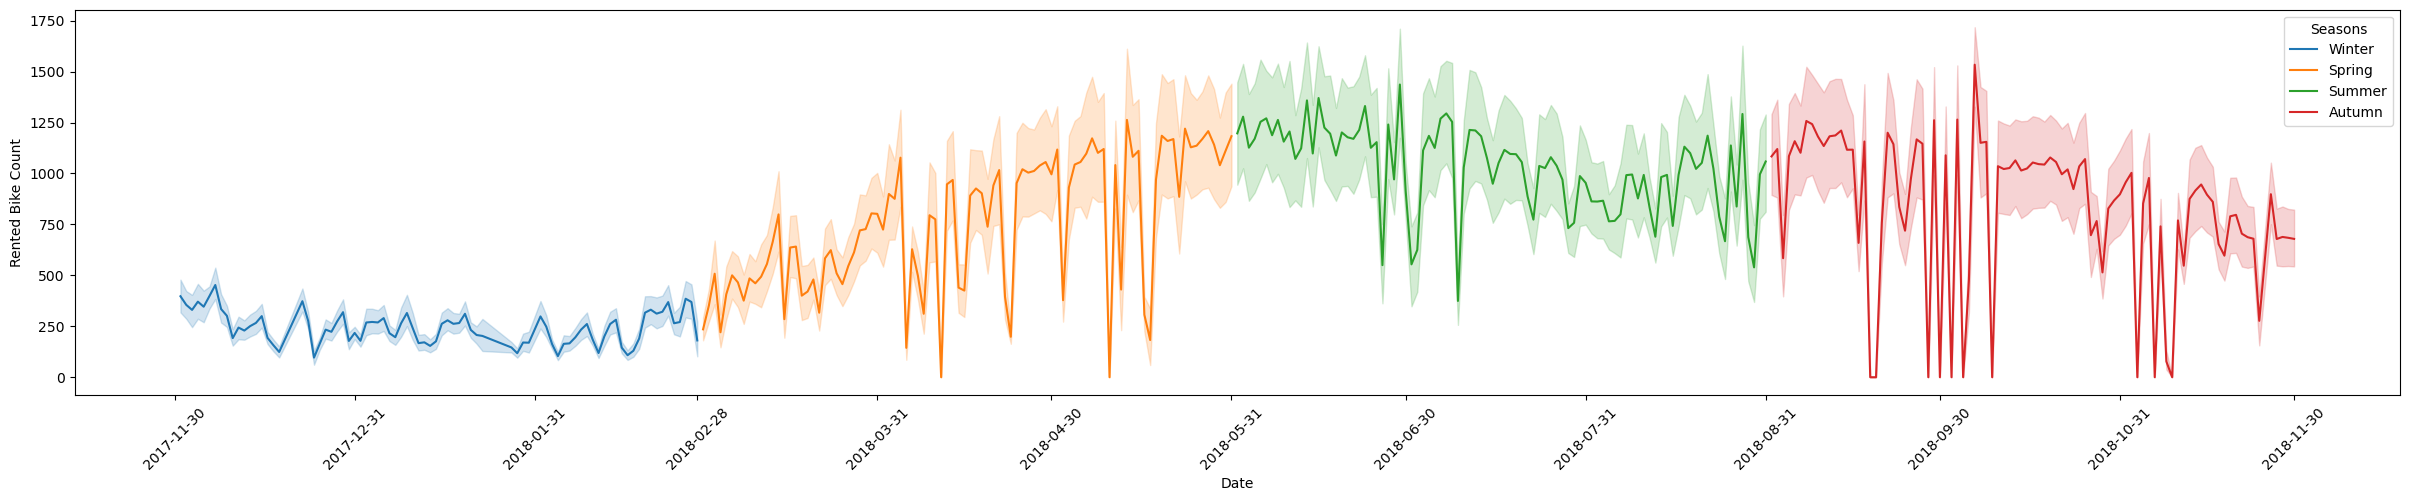

In [166]:
fig, ax = plt.subplots(figsize=(30, 5))
g = sns.lineplot(df,
                 x='Date',
                 y='Rented Bike Count',
                 hue='Seasons')
x = plt.xticks(period_range, rotation=45)

Se presenta un crecimiento después del invierno, en onde podemos observar un creciemento constante, con un algunas interrupciones de la actividad esto es debido a una falta de disponiblidad en 'Functioning Day', variable ajena en lo que se encuentra dentro del dataset y la cual no se especifica su razon. Sin embargo podemos observar un disminición del servicio en los días de otoño y primavera.

In [168]:
df[['Functioning Day', 'Seasons']].value_counts()

Functioning Day  Seasons
Yes              Spring     1945
                 Summer     1933
                 Autumn     1770
                 Winter     1753
No               Autumn      235
                 Spring       48
Name: count, dtype: int64

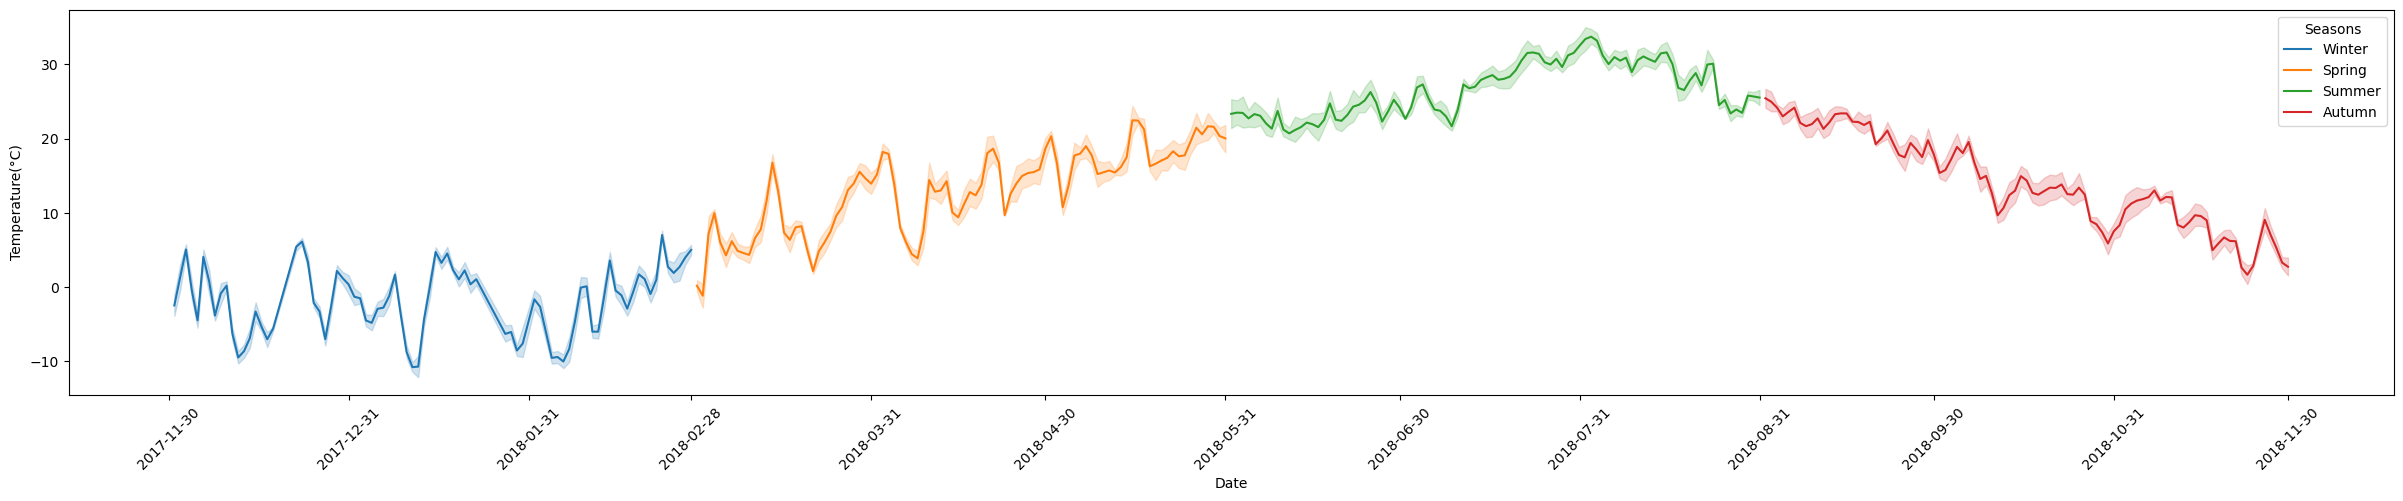

In [169]:
fig, ax = plt.subplots(figsize=(30, 5)) 
p = sns.lineplot(
    data=df, 
    x="Date", 
    y="Temperature(°C)", 
    hue='Seasons'
)
x = plt.xticks(period_range, rotation=45)

Se oberva la variacon de la temperatura a lo largo del año, podemos ver si esta relación respecto a la demanda de bicicleta en donde en verano se observa un aumento de este, sin embargo pueden existir otros factores extenernos que expliquen este aumento como puede ser el turismo, vacaciones u otros.

In [171]:
data_only_avaible = df.copy()
indexNames = data_only_avaible[data_only_avaible['Functioning Day'] == 'No'].index
data_only_avaible.drop(indexNames, inplace=True)


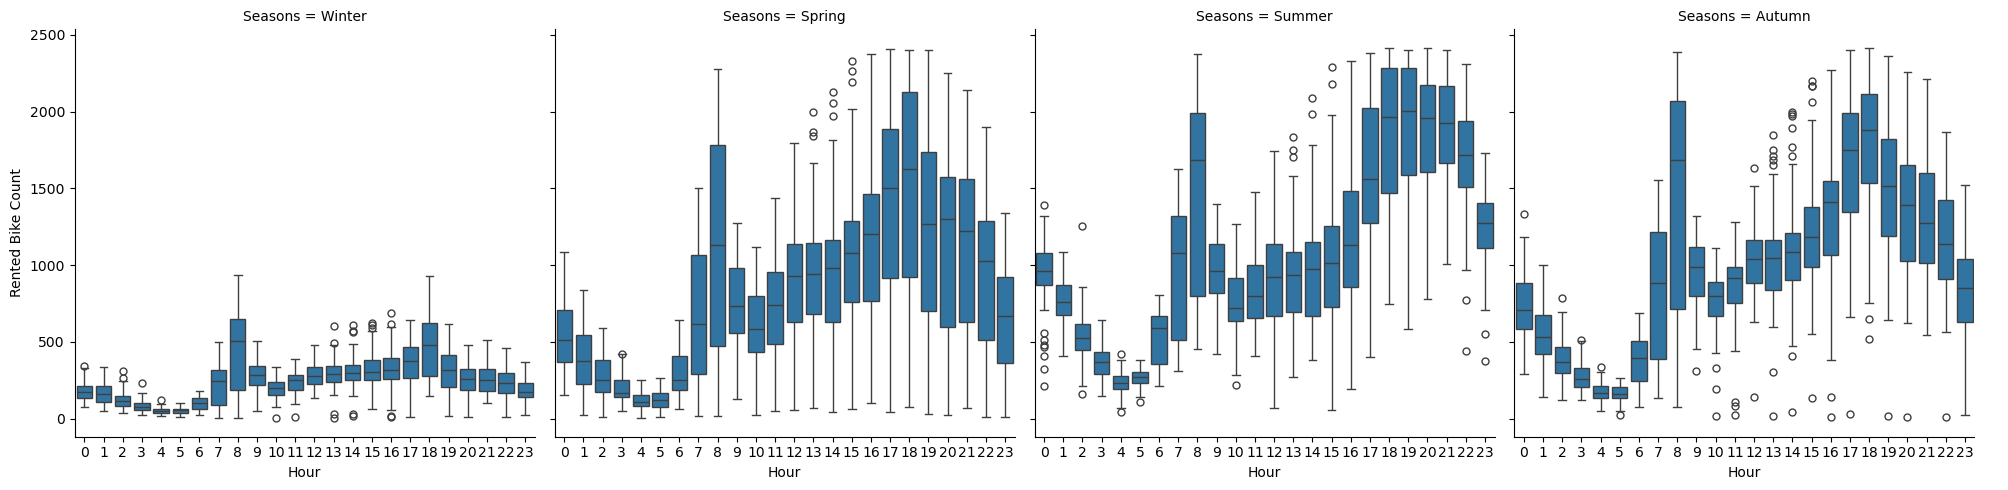

In [172]:
g = sns.catplot(data_only_avaible, x="Hour", y="Rented Bike Count", col="Seasons", kind="box")

Vemos observamos que en general la demanda se concentra entre las 8 de la manñana y 6 de la tarde en donde ademas esta significan el pick en traslados respectivamente, puede ser debido al horario laboral de la personas que se movilizan en el horario de entrada o salida. Por otra parte empieza a disminuir continuamente desde 19 horas hasta la 8 de la mañana. Tambien es bastante notable la falta de demanda por el servicio durante el invierno en contraste otras estaciones del año 

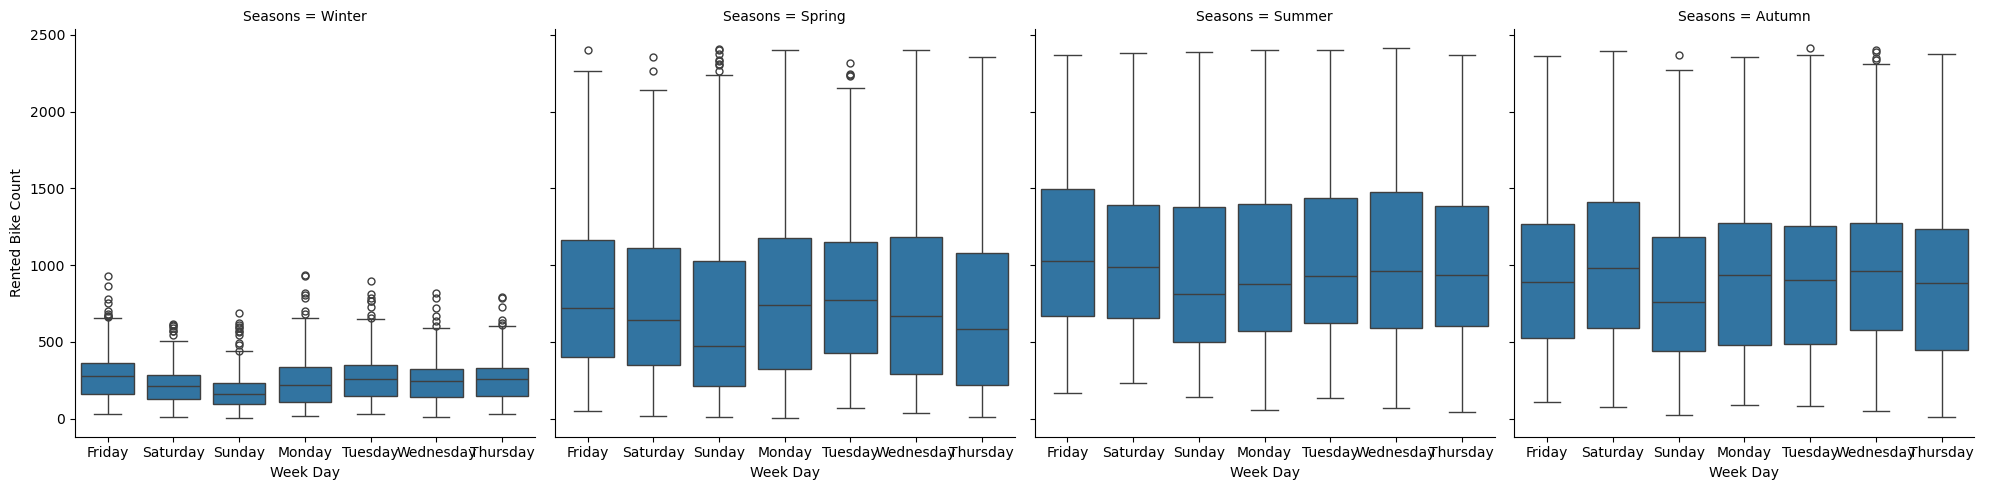

In [174]:
g = sns.catplot(data_only_avaible, x="Week Day", y="Rented Bike Count", col="Seasons", kind="box")

Se presenta un distribucion pareja de la demanda durante los dias de semana, sin embargo destaca la falta de demanda en durante la temporada de invierno posiblemente a las bajas temperaturas

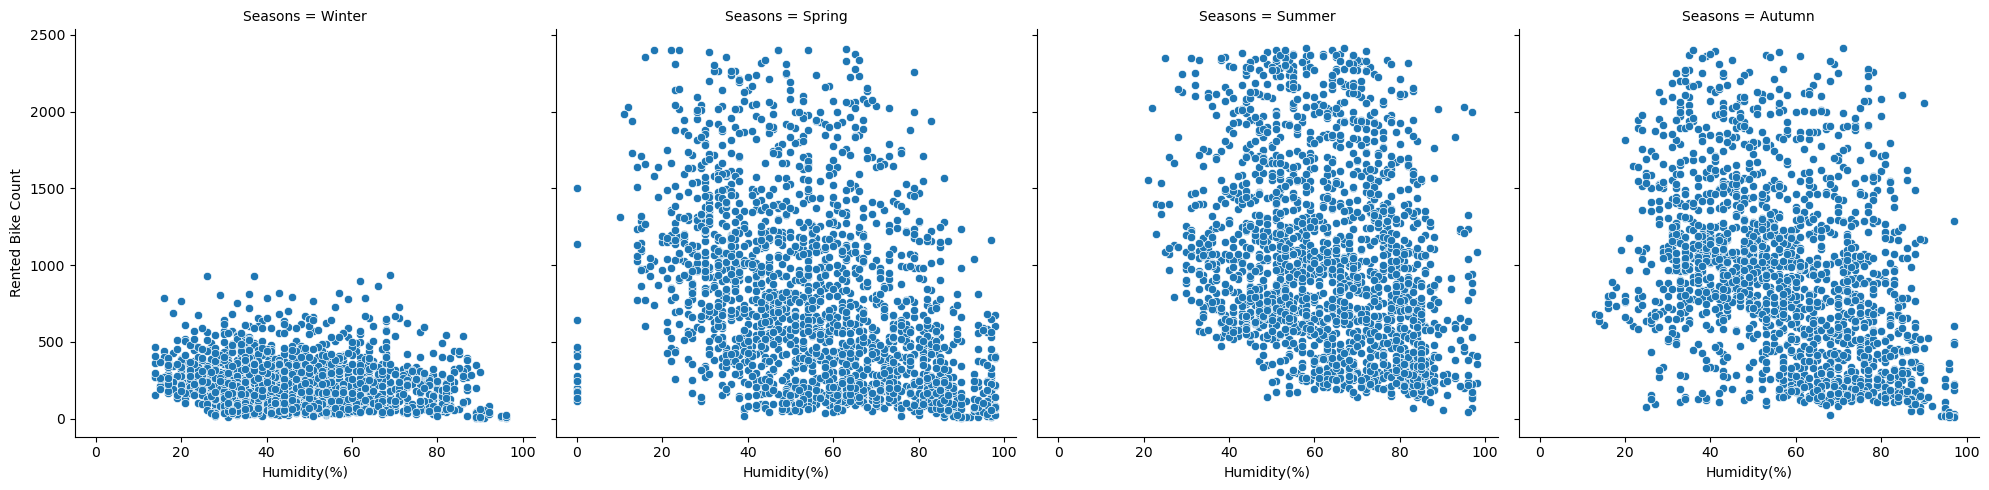

In [186]:
g = sns.relplot(
    data=data_only_avaible,
    x="Humidity(%)", y='Rented Bike Count', col="Seasons",
    kind="scatter"
)

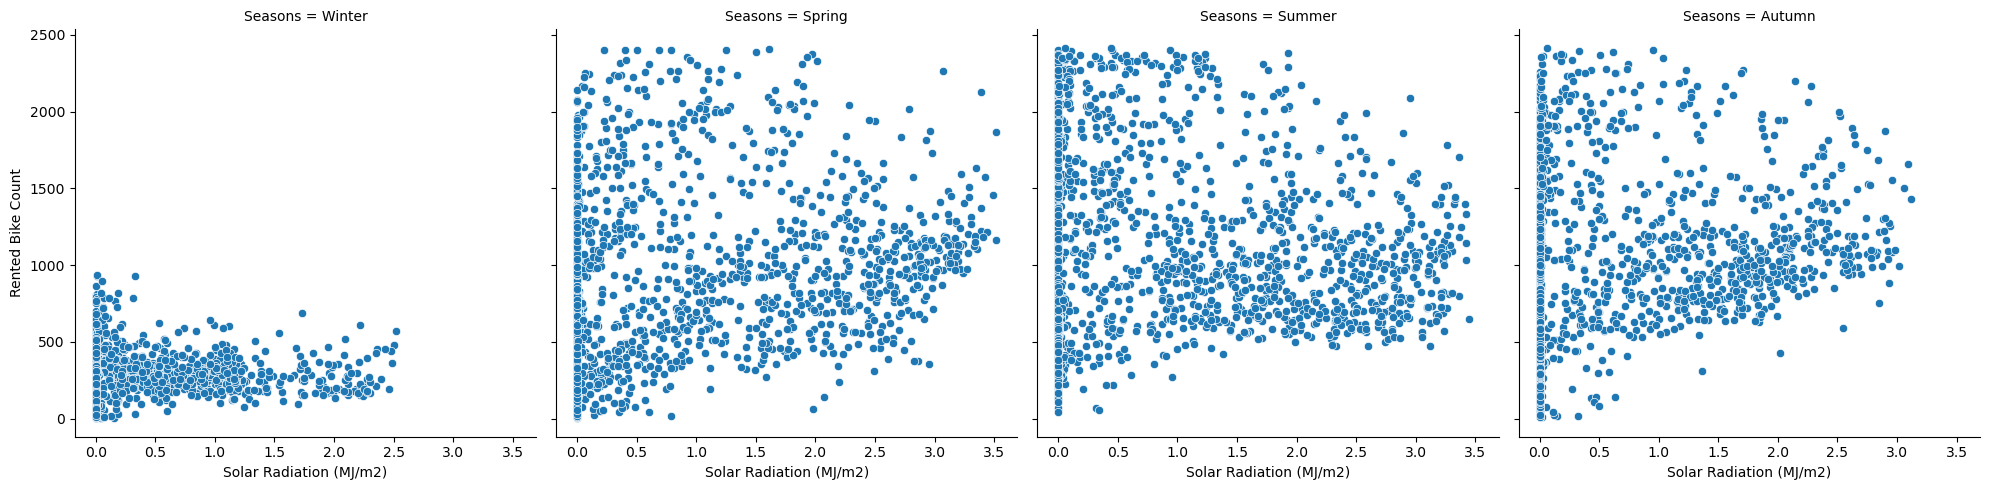

In [187]:
g = sns.relplot(
    data=data_only_avaible,
    x="Solar Radiation (MJ/m2)", y='Rented Bike Count', col="Seasons",
    kind="scatter"
)


In [188]:
df['Visibility (10m)'].describe()

count    7684.000000
mean     1484.492322
std       578.271459
min        27.000000
25%      1037.750000
50%      1749.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

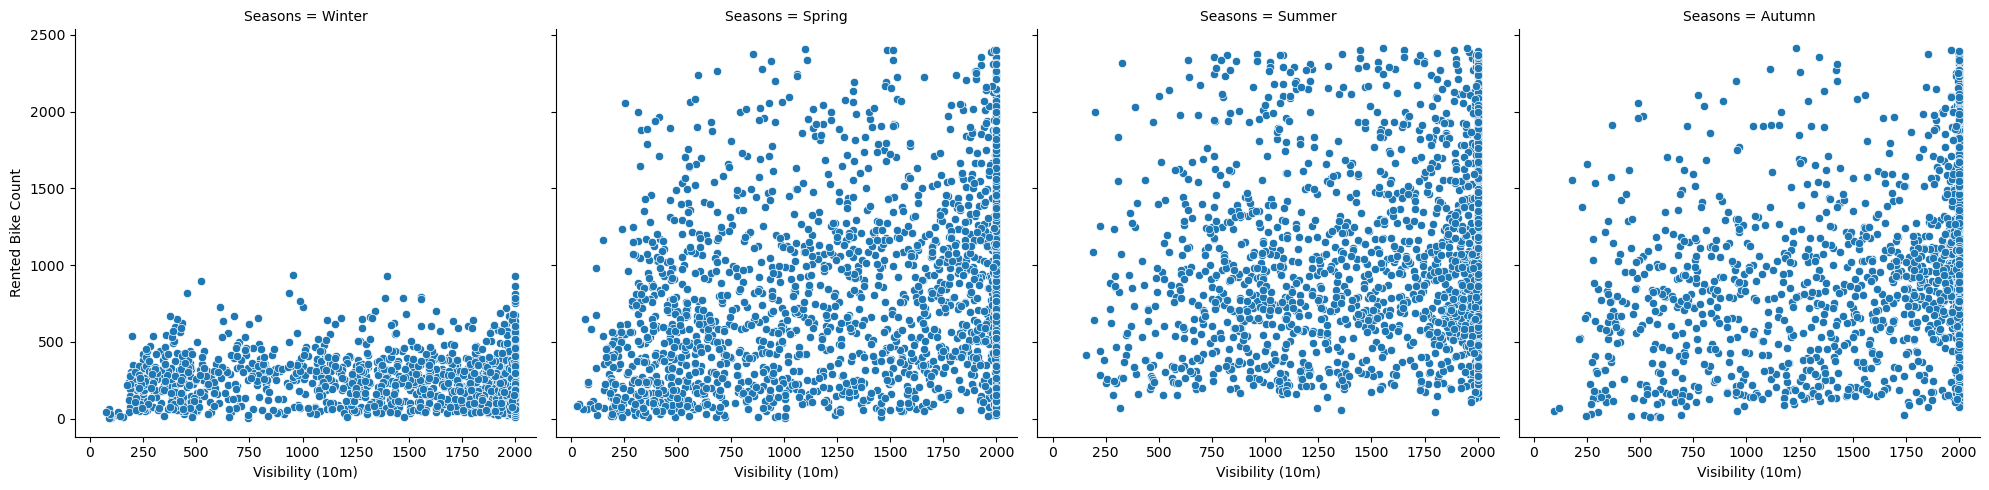

In [189]:
g = sns.relplot(
    data=data_only_avaible,
    x='Visibility (10m)', y='Rented Bike Count', col="Seasons",
    kind="scatter"
)

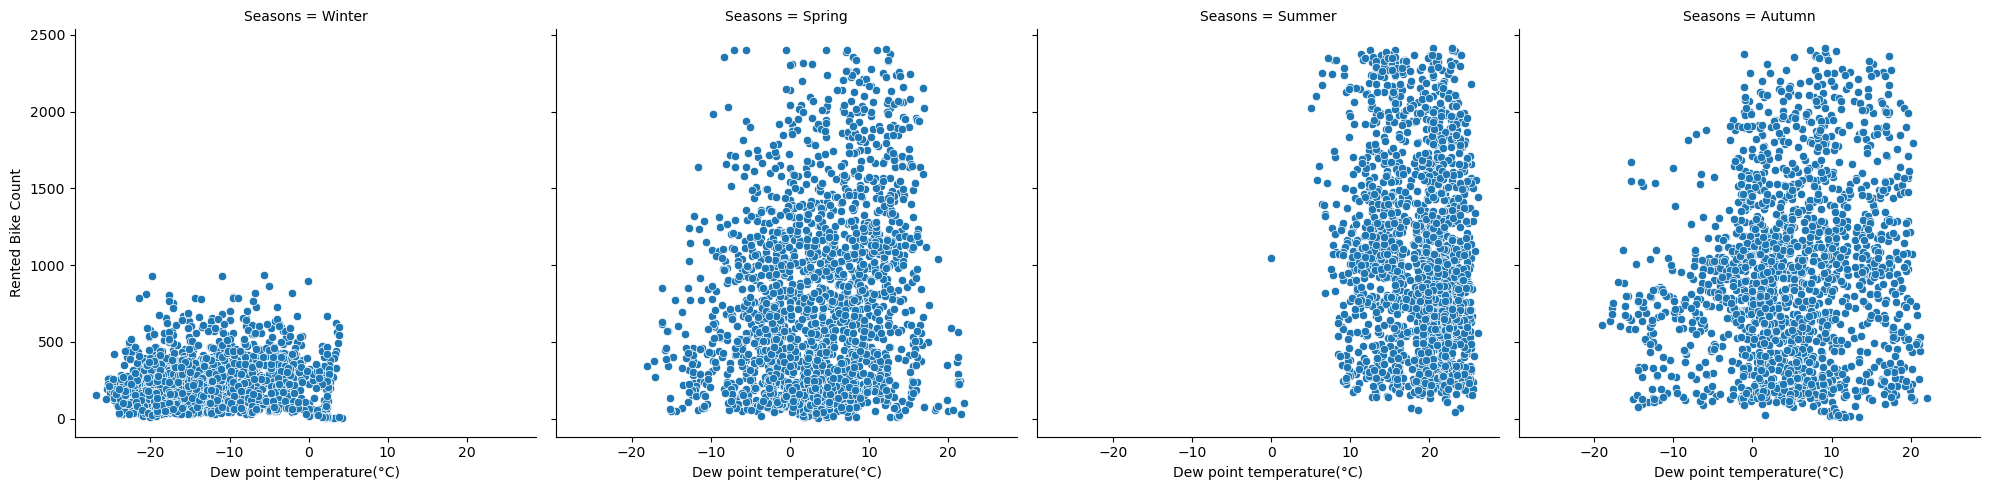

In [191]:
g = sns.relplot(
    data=data_only_avaible,
    x='Dew point temperature(°C)', y='Rented Bike Count', col="Seasons",
    kind="scatter"
)